### Librerías

In [1]:
# Manipulación de datos
import numpy as pd
import pandas as pd
# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable

# Preparación de datos 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Modelos
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import  RandomForestClassifier,  GradientBoostingClassifier, VotingClassifier,  AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import  classification_report, confusion_matrix,  accuracy_score, f1_score,  precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, make_scorer
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')


##### Evaluation : f-score macro

### Datos

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


| **Nombre de Variable**                  | **Descripción**                                                                                                           | **Tipo**       |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------|----------------|
| SeriousDlqin2yrs                       | Indica si la persona experimentó una morosidad de 90 días o peor en los últimos 2 años.                                  | *Sí/No*        |
| RevolvingUtilizationOfUnsecuredLines   | Saldo total en tarjetas de crédito y líneas de crédito personales excepto bienes raíces y sin deudas de préstamos        | Porcentaje     |
| edad                                   | Edad del prestatario en años                                                                                              | Entero         |
| NumberOfTime30-59DaysPastDueNotWorse   | Número de veces que el prestatario ha estado entre 30 y 59 días de retraso, pero no peor, en los últimos 2 años.          | Entero         |
| DebtRatio                              | Pagos de deuda mensuales, pensión alimenticia, costos de vida divididos por ingresos brutos mensuales                      | Porcentaje     |
| MonthlyIncome                          | Ingreso mensual                                                                                                           | Real           |
| NumberOfOpenCreditLinesAndLoans        | Número de préstamos abiertos (como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito) | Entero         |
| NumberOfTimes90DaysLate                | Número de veces que el prestatario ha estado 90 días o más de retraso.                                                     | Entero         |
| NumberRealEstateLoansOrLines           | Número de préstamos hipotecarios y de bienes raíces, incluyendo líneas de crédito con garantía hipotecaria.              | Entero         |
| NumberOfTime60-89DaysPastDueNotWorse   | Número de veces que el prestatario ha estado entre 60 y 89 días de retraso, pero no peor, en los últimos 2 años.          | Entero         |
| NumberOfDependents                     | Número de dependientes en la familia excluyéndose a sí mismos (cónyuge, hijos, etc.)                                       | Entero         |


### Primera exploración

In [3]:
df_train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


In [4]:
df_train.tail()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
73358,25055,0,0.010468,45y,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42y,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59y,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31y,0,0.436990,3800.0,12,0,1,0,0.0
73362,88136,0,0.136699,58y,0,0.179301,16000.0,16,0,2,0,0.0


In [5]:
df_train.shape

(73363, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

- 'Age' de tipo object -> pasar al tipo de dato correcto

In [7]:
df_train.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,75035.459564,0.065919,5.884904,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,29110.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


- 'Id' puros únicos, por ende no tendría mucha relevancia en nuestro modelo
- 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio' -> Valores máximos incoherentes 

In [8]:
df_nulos = pd.DataFrame(columns=['Porcentaje', 'Cantidad'])
df_nulos['Porcentaje'] = round((df_train.isna().sum() / len(df_train) * 100),2)
df_nulos['Cantidad'] = df_train.isna().sum()
df_nulos

,Porcentaje,Cantidad
Id,0.00,0
target,0.00,0
RevolvingUtilizationOfUnsecuredLines,0.00,0
age,0.00,0
NumberOfTime30-59DaysPastDueNotWorse,0.00,0
DebtRatio,0.00,0
MonthlyIncome,19.86,14567
NumberOfOpenCreditLinesAndLoans,0.00,0
NumberOfTimes90DaysLate,0.00,0
NumberRealEstateLoansOrLines,0.00,0


In [9]:
df_train[df_train.duplicated()]

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


<Axes: >

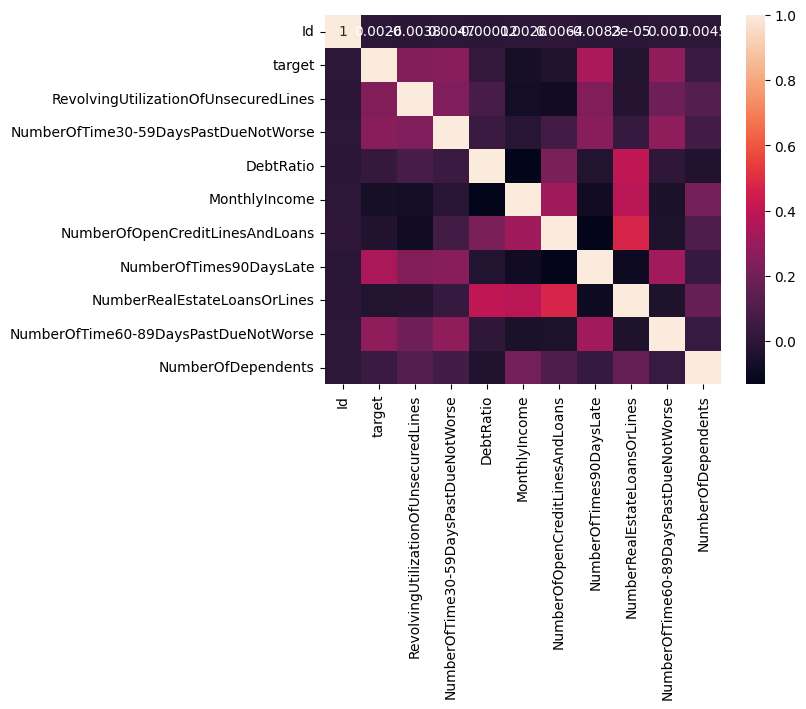

In [10]:
sns.heatmap(df_train.corr(numeric_only=True, method='spearman'), annot=True,  cbar=True)

### EDA

In [11]:
from clases import CategoricalReport, NumericReport


 ************************************************************************************************************** 

Variable : AGE

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|      48y       |            1885           |
|      49y       |            1878           |
|      63y       |            1857           |
|      50y       |            1836           |
|      47y       |            1816           |
|      46y       |            1809           |
|      62y       |            1786           |
|      52y       |            1752           |
|      56y       |            1738           |
|      53y       |            1729           |
+----------------+---------------------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
| 48y  |           1           |
+------+-----------------------+


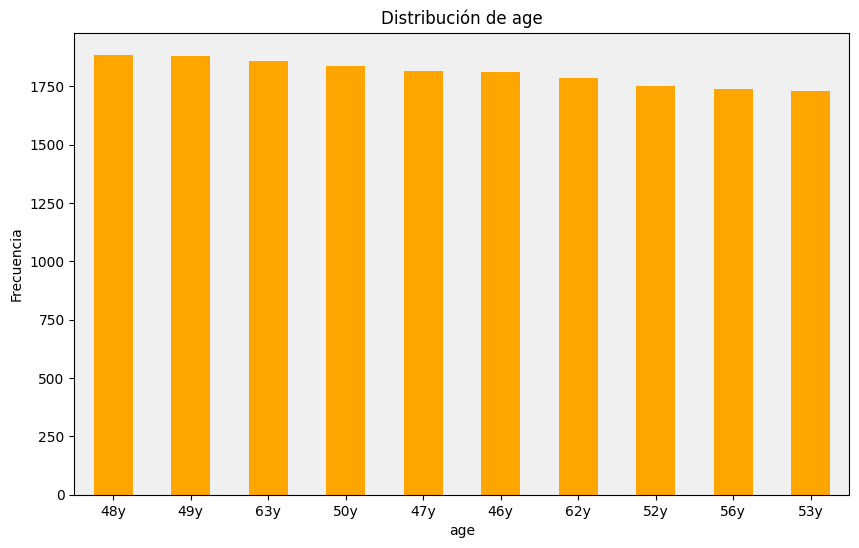

In [12]:
# Crear una instancia de la clase
categorical_reporter = CategoricalReport(df_train)
# Generar informe para la columna 'Category'
categorical_reporter.generate_report('age', color= "orange")


 ************************************************************************************************************** 

Variable : TARGET

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |   68527    |
|       1        |    4836    |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.07 |
|       Mediana       |  0.00 |
| Desviación Estándar |  0.25 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | 10.24 |
|        Asimetría         |  3.50 |
+--------------------------+-------+

 ************************************************************************************************************** 



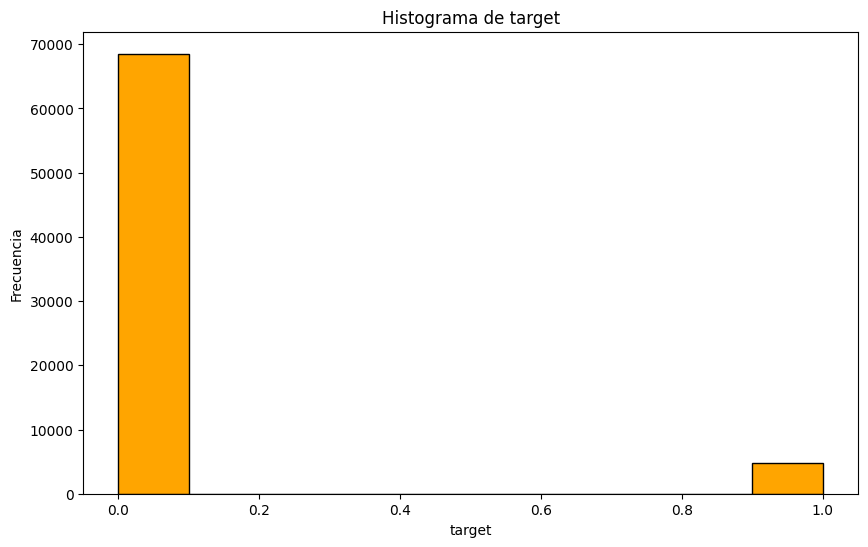


 ************************************************************************************************************** 

Variable : REVOLVINGUTILIZATIONOFUNSECUREDLINES

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      0.0       |    5298    |
|   0.9999999    |    5020    |
|      1.0       |     9      |
|  0.954091816   |     5      |
|   0.9500998    |     4      |
|  0.037498125   |     4      |
|  0.035964036   |     4      |
|    0.004999    |     4      |
|   0.00179991   |     4      |
|  0.921078921   |     4      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+--------+
|  Medidas Centrales  | Valor  |
+---------------------+--------+
|        Media        |  5.88  |
|       Mediana       |  0.15  |
| Desviación Estándar | 235.51 |
+---------------------+--------+

+--------------------------+---------+
| Forma de la Distribución |  Valor  |
+--------------------------+----

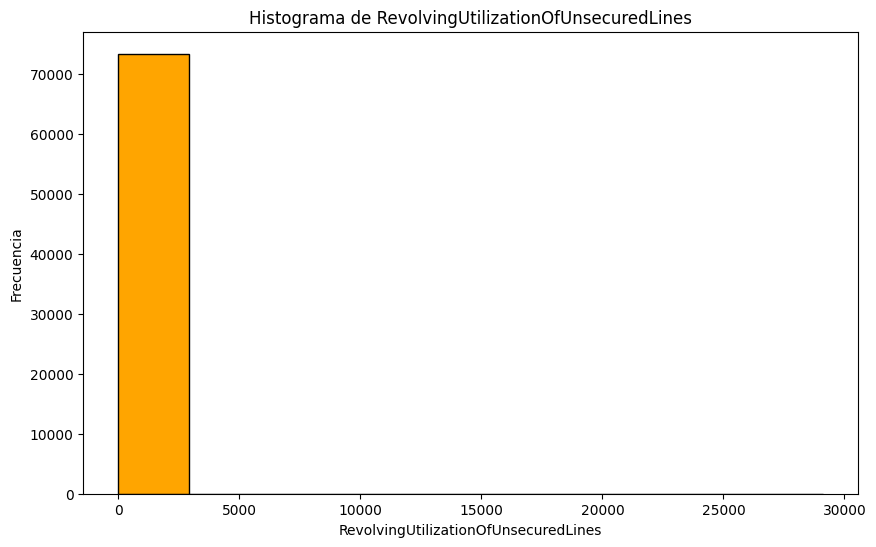


 ************************************************************************************************************** 

Variable : NUMBEROFTIME30-59DAYSPASTDUENOTWORSE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |   61695    |
|       1        |    7795    |
|       2        |    2259    |
|       3        |    859     |
|       4        |    364     |
|       5        |    156     |
|       98       |    124     |
|       6        |     63     |
|       7        |     31     |
|       8        |     8      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.41 |
|       Mediana       |  0.00 |
| Desviación Estándar |  4.09 |
+---------------------+-------+

+--------------------------+--------+
| Forma de la Distribución | Valor  |
+--------------------------+--------+
|  

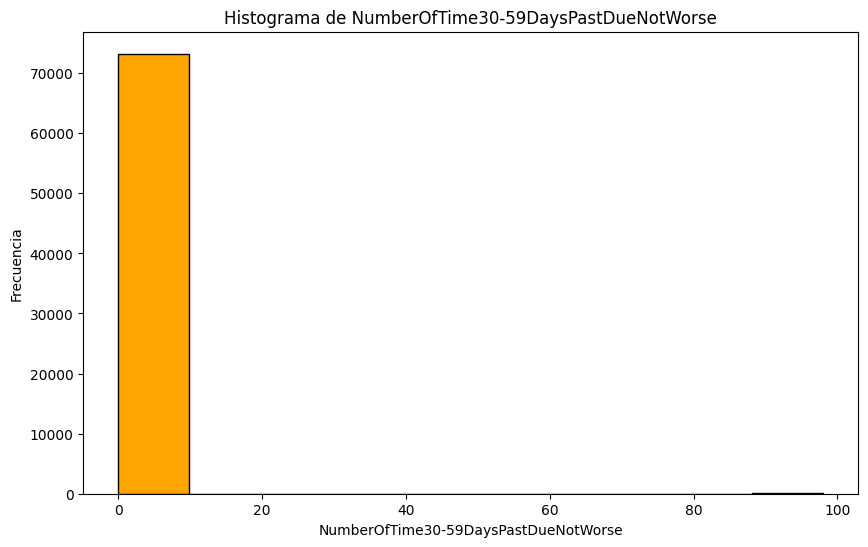


 ************************************************************************************************************** 

Variable : DEBTRATIO

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      0.0       |    2085    |
|      1.0       |    126     |
|      4.0       |     87     |
|      2.0       |     80     |
|      5.0       |     72     |
|      3.0       |     71     |
|      9.0       |     66     |
|      10.0      |     60     |
|      15.0      |     57     |
|      13.0      |     57     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+---------+
|  Medidas Centrales  |  Valor  |
+---------------------+---------+
|        Media        |  359.75 |
|       Mediana       |   0.37  |
| Desviación Estándar | 2477.65 |
+---------------------+---------+

+--------------------------+----------+
| Forma de la Distribución |  Valor   |
+--------------------------+----------+
|         

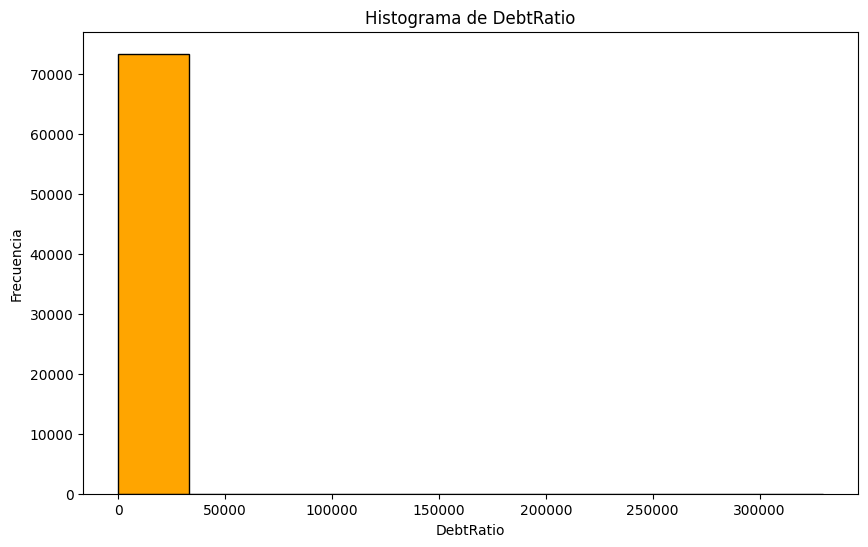


 ************************************************************************************************************** 

Variable : MONTHLYINCOME

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|     5000.0     |    1346    |
|     4000.0     |    1025    |
|     6000.0     |    943     |
|     3000.0     |    843     |
|      0.0       |    784     |
|     2500.0     |    759     |
|    10000.0     |    716     |
|     3500.0     |    665     |
|     7000.0     |    586     |
|     4500.0     |    581     |
+----------------+------------+

Nulos: 14567 (19.86%) sobre el total: 73363 rows

+---------------------+----------+
|  Medidas Centrales  |  Valor   |
+---------------------+----------+
|        Media        | 6649.14  |
|       Mediana       | 5400.00  |
| Desviación Estándar | 10461.63 |
+---------------------+----------+

+--------------------------+---------+
| Forma de la Distribución |  Valor  |
+--------------------------+--------

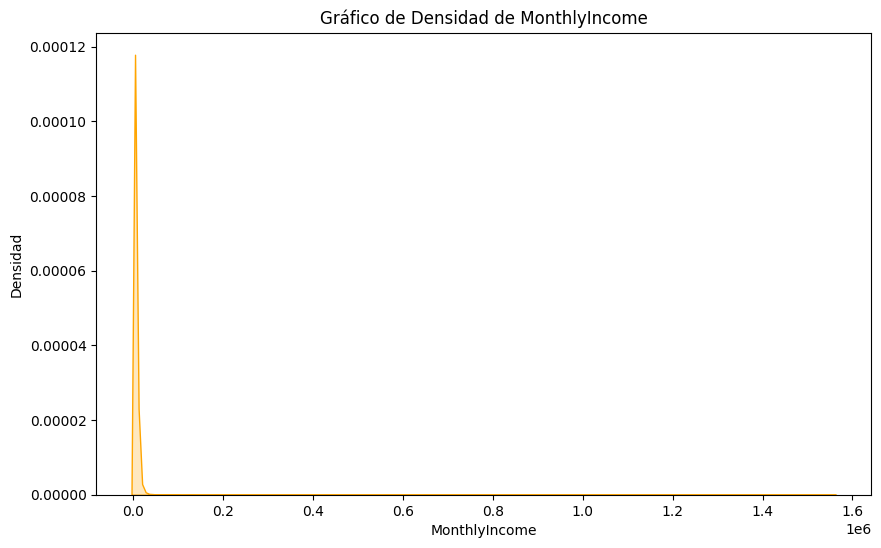


 ************************************************************************************************************** 

Variable : NUMBEROFOPENCREDITLINESANDLOANS

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       6        |    6643    |
|       7        |    6464    |
|       5        |    6287    |
|       8        |    6224    |
|       4        |    5724    |
|       9        |    5604    |
|       10       |    4672    |
|       3        |    4384    |
|       11       |    4070    |
|       12       |    3430    |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  8.44 |
|       Mediana       |  8.00 |
| Desviación Estándar |  5.14 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         C

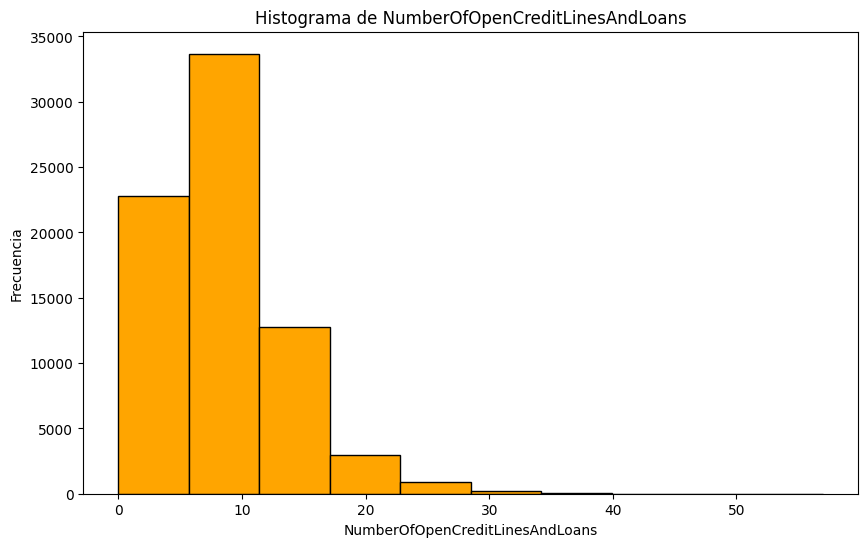


 ************************************************************************************************************** 

Variable : NUMBEROFTIMES90DAYSLATE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |   69342    |
|       1        |    2534    |
|       2        |    739     |
|       3        |    318     |
|       4        |    147     |
|       98       |    124     |
|       5        |     68     |
|       6        |     36     |
|       7        |     22     |
|       8        |     11     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.26 |
|       Mediana       |  0.00 |
| Desviación Estándar |  4.07 |
+---------------------+-------+

+--------------------------+--------+
| Forma de la Distribución | Valor  |
+--------------------------+--------+
|         Curtos

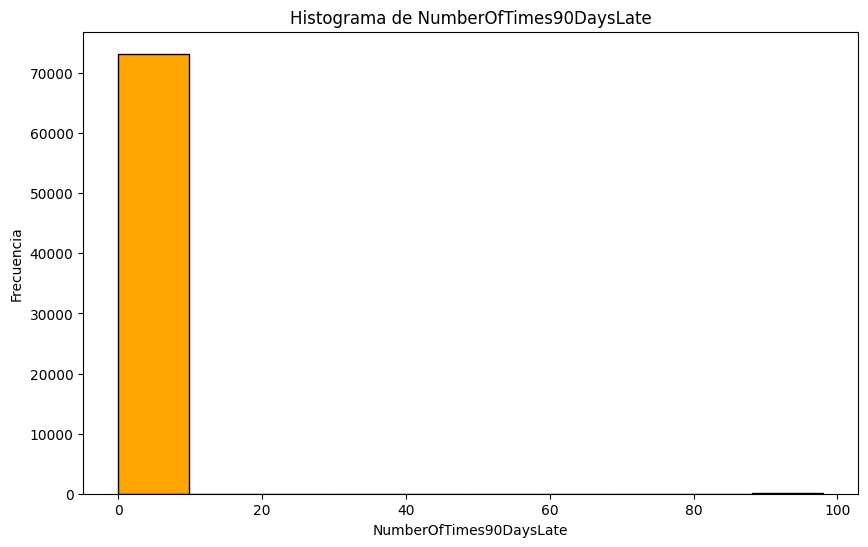


 ************************************************************************************************************** 

Variable : NUMBERREALESTATELOANSORLINES

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |   27561    |
|       1        |   25441    |
|       2        |   15416    |
|       3        |    3166    |
|       4        |    1071    |
|       5        |    311     |
|       6        |    158     |
|       7        |     82     |
|       8        |     51     |
|       9        |     36     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  1.02 |
|       Mediana       |  1.00 |
| Desviación Estándar |  1.14 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curt

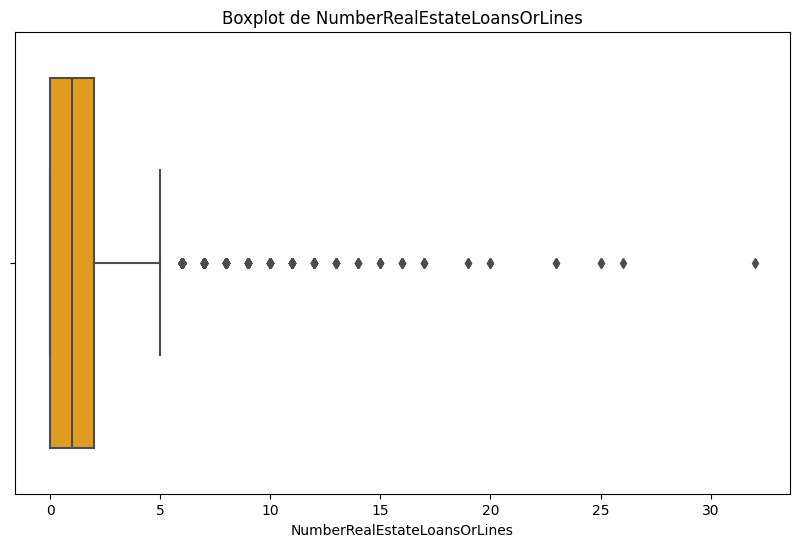


 ************************************************************************************************************** 

Variable : NUMBEROFTIME60-89DAYSPASTDUENOTWORSE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |   69677    |
|       1        |    2766    |
|       2        |    539     |
|       3        |    169     |
|       98       |    124     |
|       4        |     55     |
|       5        |     16     |
|       6        |     8      |
|       7        |     6      |
|       9        |     1      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.23 |
|       Mediana       |  0.00 |
| Desviación Estándar |  4.05 |
+---------------------+-------+

+--------------------------+--------+
| Forma de la Distribución | Valor  |
+--------------------------+--------+
|  

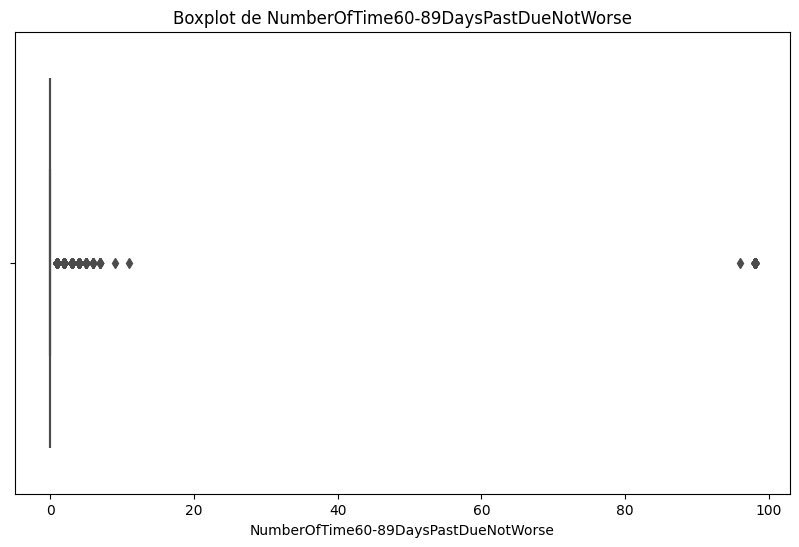


 ************************************************************************************************************** 

Variable : NUMBEROFDEPENDENTS

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      0.0       |   42515    |
|      1.0       |   12910    |
|      2.0       |    9476    |
|      3.0       |    4614    |
|      4.0       |    1442    |
|      5.0       |    353     |
|      6.0       |     74     |
|      7.0       |     26     |
|      8.0       |     7      |
|      9.0       |     3      |
+----------------+------------+

Nulos: 1942 (2.65%) sobre el total: 73363 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.76 |
|       Mediana       |  0.00 |
| Desviación Estándar |  1.11 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis   

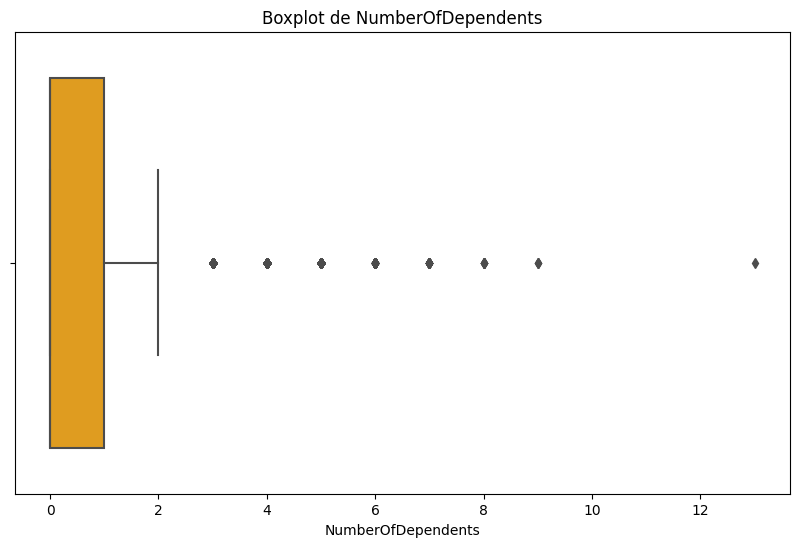

In [13]:
# Crear una instancia de la clase
numeric_reporter = NumericReport(df_train)
# Generar informe para la columna 'Numeric'
numeric_reporter.generate_report('target', 'histograma', color= "orange")
numeric_reporter.generate_report('RevolvingUtilizationOfUnsecuredLines', 'histograma', color= "orange")
numeric_reporter.generate_report('NumberOfTime30-59DaysPastDueNotWorse', 'histograma', color= "orange")
numeric_reporter.generate_report('DebtRatio', 'histograma', color= "orange")
numeric_reporter.generate_report('MonthlyIncome', 'densidad',color= "orange")
numeric_reporter.generate_report('NumberOfOpenCreditLinesAndLoans', 'histograma', color= "orange")
numeric_reporter.generate_report('NumberOfTimes90DaysLate', 'histograma',  color= "orange")
numeric_reporter.generate_report('NumberRealEstateLoansOrLines', 'boxplot', color= "orange")
numeric_reporter.generate_report('NumberOfTime60-89DaysPastDueNotWorse', 'boxplot', color= "orange")
numeric_reporter.generate_report('NumberOfDependents', 'boxplot', color= "orange")


1. La target se encuentra desvalanceada

2.       0.0       |    5298    | |   0.9999999    |    5020    | |      1.0       |     9   -> se usó todo o nada.
3. La gran mayoría no pasó de los 30 días sin pagar.

4.         Media        |  359.75 | |       Mediana       |   0.37  || Desviación Estándar | 2477.65 | -> la dispersión de las deudas es bastante.
5. Presenta nulos
6. Prsenta un comportamiento exponencial
7. La gran mayoría no se pasó del límite de 90 días
8. Se encuentra entre 0 y 5 bienes y raíces, 30 aparece como un outlier.
9. La gran mayoría no superó los 89 días sin pagar
10. Se encuentran agrupados entre 0 y 2 con outliers de 12 

### Valores atípicos y tratamiento de missings 1

In [14]:
# age hay que pasarla al tipo de dato correcto
df_train['age'] = df_train['age'].str.replace('y', '').astype(int)

In [15]:
# Imputaremos el monthlyIncome con la media
df_train['MonthlyIncome'].fillna( df_train['MonthlyIncome'].mean(), inplace=True)
MEDIA = round(df_train['NumberOfDependents'].mean(),0)
df_train['NumberOfDependents'].fillna( MEDIA , inplace=True)

In [16]:
df_train.isna().sum()

Id                                      0
target                                  0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Feature Engineer

In [17]:
df_train.head(2)

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0


In [18]:
# Ratio de Deuda con respecto a los Ingresos Mensuales: Esta columna podría representar la proporción de la deuda en relación con los ingresos mensuales.
# df_train['DebtToIncomeRatio'] = round(df_train['DebtRatio'] / df_train['MonthlyIncome'],3) -> valores muy grandes
# Proporción de Líneas de Crédito Abiertas al Número de Dependientes: Esta columna podría representar la relación entre el número de líneas de crédito abiertas y el número de dependientes.
df_train['CreditLinesPerDependent'] = round(df_train['NumberOfOpenCreditLinesAndLoans'] / (df_train['NumberOfDependents'] + 1),2)  # Se suma 1 para evitar divisiones por cero
# df_train['DebtToIncomeRatio'].fillna(0, inplace = True)

In [19]:
df_train.isna().sum()

Id                                      0
target                                  0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
CreditLinesPerDependent                 0
dtype: int64

### División de datos

In [20]:
df_train.columns

Index(['Id', 'target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CreditLinesPerDependent'],
      dtype='object')

In [21]:
from imblearn.over_sampling import SMOTE
X = df_train.drop(columns=['Id', 'target'])
y = df_train['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state= 24)

<Axes: xlabel='target', ylabel='Count'>

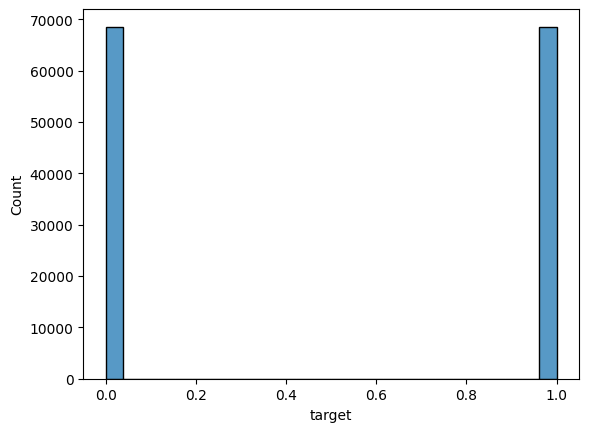

In [22]:
sns.histplot(y_resampled)

In [23]:
x_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CreditLinesPerDependent
59556,0.133706,57,0,0.122251,3500.000000,7,0,0,0,2.000000,2.330000
31535,0.000000,49,0,0.148337,4900.000000,5,0,0,0,1.000000,2.500000
112199,0.957113,43,0,0.094980,4718.887171,2,0,0,0,3.852138,0.518289
84333,0.699871,66,0,0.846199,1000.000000,6,0,0,0,0.000000,6.346346
106760,0.660278,50,0,0.718890,3500.000000,20,0,1,0,2.000000,6.738375
...,...,...,...,...,...,...,...,...,...,...,...
36731,1.000000,31,0,18.000000,6649.144670,0,0,0,0,0.000000,0.000000
7563,0.045217,62,0,1247.000000,0.000000,12,0,2,0,2.000000,4.000000
45039,0.145429,46,0,0.223276,8325.000000,7,0,2,0,2.000000,2.330000
6500,0.229622,29,0,0.056305,5558.000000,7,0,0,0,0.000000,7.000000


In [24]:
x_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CreditLinesPerDependent
19589,0.326158,47,0,0.280172,5335.000000,10,0,1,0,0.000000,10.000000
41157,0.066625,58,0,3423.000000,6649.144670,15,0,4,0,0.000000,15.000000
88881,0.117129,44,1,1.215622,5015.557250,10,0,3,0,2.295166,3.305470
36830,0.236288,64,0,0.035392,3983.000000,2,0,0,0,0.000000,2.000000
73734,1.233456,50,0,0.082266,6422.698099,3,0,0,0,0.543631,2.184553
...,...,...,...,...,...,...,...,...,...,...,...
94254,0.567638,47,2,0.628434,5000.000000,14,0,1,0,3.275345,3.814517
113757,0.249291,33,0,2403.710801,0.000000,5,0,1,0,0.989560,2.578302
66185,0.077386,33,1,0.977503,2666.000000,20,0,1,0,1.000000,10.000000
94038,0.628087,58,0,0.301341,5421.927257,10,0,0,0,1.461158,4.499286


<Axes: xlabel='target', ylabel='Count'>

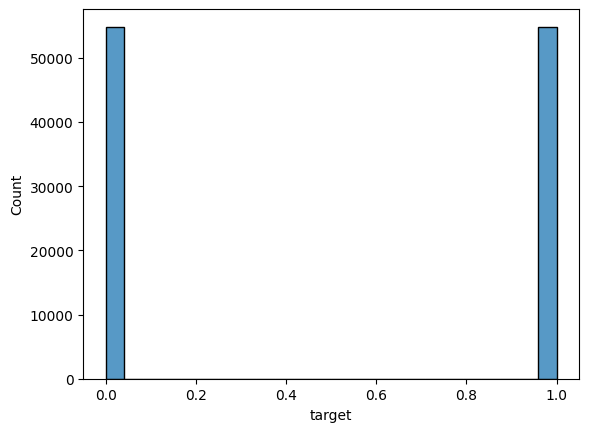

In [25]:
sns.histplot(y_train)

### Escalado

In [26]:
col_minmax = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'CreditLinesPerDependent' ]

minmax = MinMaxScaler()

X_train_minmax = minmax.fit_transform(x_train[col_minmax])
x_train[col_minmax] = X_train_minmax

X_test_minmax = minmax.transform(x_test[col_minmax])
x_test[col_minmax] = X_test_minmax

### BaseLine

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# modelos = {
#     # "Logistic Regression": LogisticRegression(random_state=24),
#     "Random Forest" : RandomForestClassifier(max_depth=10, random_state=24),
#     "Boosting": AdaBoostClassifier(n_estimators=10, random_state=24),
# }

# # Define las métricas a usar
# metricas = ["accuracy", "f1_macro", "roc_auc_ovr"]

# resultados_dict = {}

# for nombre_modelo, modelo in modelos.items():
#     cv_resultados = cross_validate(modelo, x_train, y_train, cv=5, scoring=metricas)
    
#     for metrica in metricas:
#         clave = f"{nombre_modelo}_{metrica}"
#         resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# # Convertir el diccionario de resultados en DataFrame
# resultados_df = pd.DataFrame([resultados_dict])

# resultados_df.T

### Hiperparámetros

In [28]:
# La idea del Grid Search es de los mejores modelos que funcionan, aplicarle los mejores hiperparámetros.
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': np.arange(7,10,1),
}

rnd_clas = RandomForestClassifier()

random_search = GridSearchCV(rnd_clas, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                                #    random_state=1, # Semilla
                                #    n_iter=100, # Nº de iteraciones del random search
                            cv=5, # Folds del cross validation
                            scoring="f1_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                                  )

random_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([7, 8, 9])},
             scoring='f1_macro')

In [29]:
# Mejores parámetros del modelo
random_search.best_params_

{'bootstrap': True, 'max_depth': 9}

In [30]:
random_search.best_estimator_.score(x_test, y_test)

0.8369632629236438

### Seleccionar modelo

In [31]:
# {'bootstrap': True, 'max_depth': 9} RandomForest()
random_search = RandomForestClassifier(bootstrap=True, max_depth=9)
random_search.fit(x_train, y_train)

RandomForestClassifier(max_depth=9)

### Predicción del modelo

In [33]:
y_pred = random_search.predict(x_test)

In [35]:
f1_score(y_test, random_search.predict(x_test), average='macro')

0.8377765477085506

### Validar modelo

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     13676
           1       0.87      0.80      0.83     13735

    accuracy                           0.84     27411
   macro avg       0.84      0.84      0.84     27411
weighted avg       0.84      0.84      0.84     27411



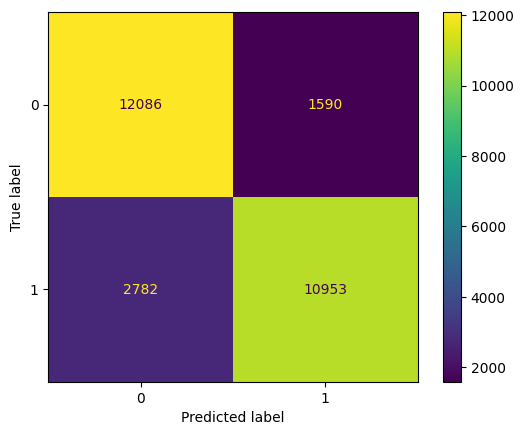

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Abrimos df_test

In [37]:
testeando = pd.read_csv('./data/sample_submission.csv')
testeando.shape

(31442, 2)

In [38]:
df_test = pd.read_csv('./data/test.csv')

In [39]:
# age hay que pasarla al tipo de dato correcto
df_test['age'] = df_test['age'].str.replace('y', '').astype(int)
# Imputaremos el monthlyIncome con la media
df_test['MonthlyIncome'].fillna( df_test['MonthlyIncome'].mean(), inplace=True)
MEDIA = round(df_test['NumberOfDependents'].mean(),0)
df_test['NumberOfDependents'].fillna( MEDIA , inplace=True)

df_test['CreditLinesPerDependent'] = round(df_test['NumberOfOpenCreditLinesAndLoans'] / (df_test['NumberOfDependents'] + 1),2)  # Se suma 1 para evitar divisiones por cero

In [40]:
col_minmax = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'CreditLinesPerDependent' ]

minmax = MinMaxScaler()

X_test_minmax = minmax.fit_transform(df_test[col_minmax])
df_test[col_minmax] = X_test_minmax

In [47]:
df_ = df_test[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CreditLinesPerDependent']]

In [48]:
df_.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CreditLinesPerDependent'],
      dtype='object')

In [49]:
x_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CreditLinesPerDependent'],
      dtype='object')

In [50]:
predictions_submit = random_search.predict(df_)
predictions_submit

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Subir a kaggle

In [53]:
submission = pd.DataFrame({"Id": df_test['Id'], "target": predictions_submit})
submission.head()

,Id,target
0,15576,0
1,94308,0
2,53983,1
3,61359,0
4,71383,0


In [54]:
submission.shape

(31442, 2)

In [56]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == df_test.shape:
        if df_to_submit.columns.all() == df_test.columns.all():
            if df_to_submit.Id.all() == df_test.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [57]:
chequeator(submission)

Check the number of rows and/or columns and try again

Mensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.


In [58]:
submission.to_csv('./data/Submission_2.csv', index=False)